In [89]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
np.random.seed(123)

# Load Data

In [90]:
data = pd.read_csv(r'./maps/FVG/FVG_companies.csv', dtype='str')
data.columns = ['ind', 'cf', 'company','unit', 'lat', 'lon']
data['lat'] = data['lat'].astype(float)
data['lon'] = data['lon'].astype(float)
data.shape
data.columns
data.head(3)

,ind,cf,company,unit,lat,lon
0,NaN,00079760328,ADRIA DIESEL S.R.L.,UL-1,45.954335,13.310425
1,". AUTOPORTO DOGANALE S.LEOPOLDO 4, 33016, PONT...",00521770321,FRANCESCO PARISI CASA DI SPEDIZIONI S.P.A.,UL-1,46.506568,13.305583
2,". MARINA DI AURISINA 153/L, 34011, DUINO AURIS...",00968120329,MOTOMARINE - SOCIETA A RESPONSABILITA LIMITATA,UL-12,45.750680,13.669504


# Data Exploration

In [91]:
def plot_clusters(X, cluster_labels, title=""):
    for i in np.unique(cluster_labels):
        cluster_points = X[cluster_labels == i , :]       
        if i == 0: 
            ax.scatter(cluster_points[:,0] , cluster_points[:,1] , color="yellow", marker='.', s=2)
        else:
            ax.scatter(cluster_points[:,0] , cluster_points[:,1] , cmap = i, marker='o', s=2)

    ax.set_title(title, fontweight='bold')
    #ax.set_aspect('equal')


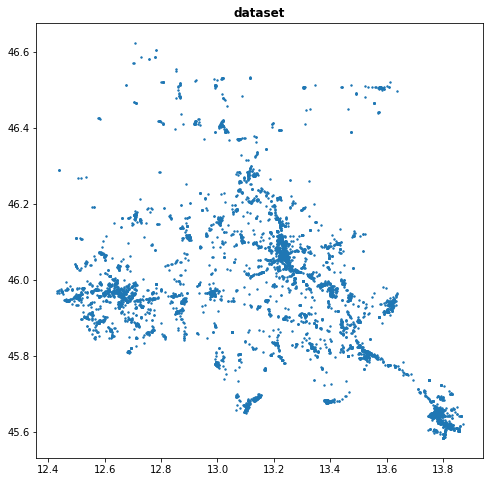

In [92]:
X = np.array(data[ ['lon','lat'  ] ]) 
#X = (X - X.mean(axis=0))/X.std()
n, p  = X.shape
_, ax = plt.subplots(figsize=(8,8))
plot_clusters(X, np.ones(n), title = "dataset")
plt.show()


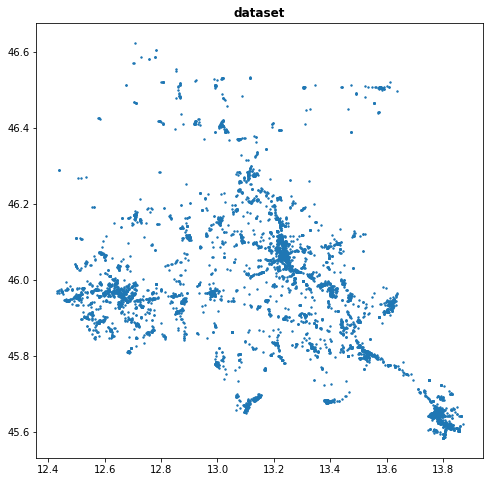

In [199]:
X = np.array(data[ ['lon','lat'  ] ]) 
# X = (X - X.mean(axis=0)) 
# X[:,0] = X[:,0]*60
# X[:,1] = X[:,1]*111

n, p  = X.shape
_, ax = plt.subplots(figsize=(8,8))
plot_clusters(X, np.ones(n), title = "dataset")
plt.show()

## Scaling factor

In [94]:
# approximated, valid only at short distances but good enough to give a rougn idea of epsilon

R = 6371 #earth radius
lon1, lat1,  =  12.6, 46.0
lon2, lat2   =  13.8, 46.0
# longitude x
dx = R*(lon2-lon1)*np.cos(lat1)*np.pi/180
# latitude y
dy = R* (lat2-lat1)*np.pi/180
d =  np.sqrt(dx**2 +  dy**2)
dx, dy

(-57.66719385463093, 0.0)

In [95]:
lon1, lat1,  =  13.2, 45.6
lon2, lat2   =  13.2, 46.6
# longitude x
dx = R*(lon2-lon1)*np.cos(lat1)*np.pi/180
# latitude y
dy = R* (lat2-lat1)*np.pi/180
d =  np.sqrt(dx**2 +  dy**2)
dx, dy

(-0.0, 111.19492664455873)

## calculate density for each point

In [200]:
distance = 1
epsilon = 1/100
dm = distance_matrix(X,X)
density = np.zeros(n).astype(int)
for j in range(n):
    density[j] = len(np.unique(np.where( dm[j] < epsilon )).flatten())

    


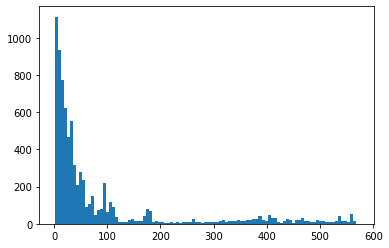

In [201]:
plt.hist(density, bins=100)
plt.show()

In [211]:

from scipy.stats import kde
k = kde.gaussian_kde(X.T)
nbins=300
x = X[:,0]
y = X[:,1]
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)
zi = zi/np.max(zi)
plt.hist(np.reshape(zi,-1), bins = 100)
plt.show

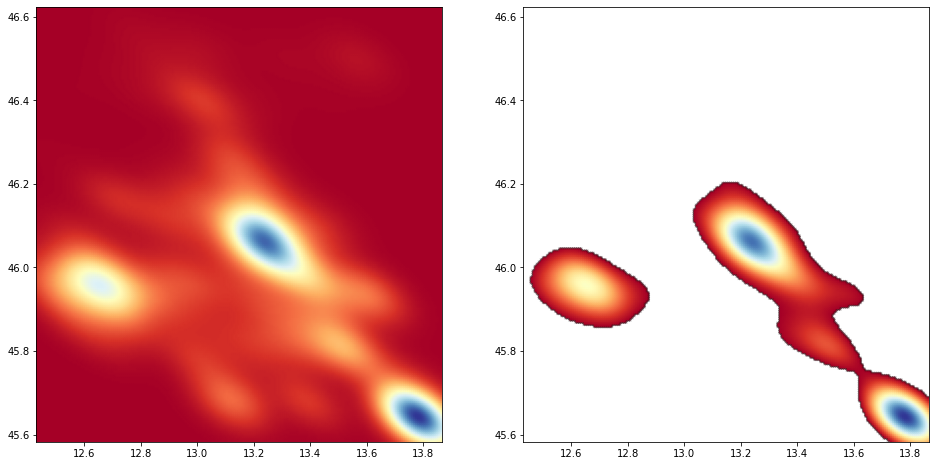

In [209]:
threshold = .2
z_mask = np.ma.masked_array(zi, zi <threshold)
fig, (ax1,ax2) = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
cmap="RdYlBu"
ax1.pcolormesh(xi, yi, zi, shading='gouraud', cmap=cmap)
ax2.pcolormesh(xi, yi, z_mask, shading='gouraud', cmap=cmap)


In [203]:
def plot_map(df, color_fill = "green", alpha = .2, color_border= "gray" , linewidth = .8):
    for _, row in df.iterrows():
        x, y = list(zip(*row.poly)) 
        plt.fill(x,y, color = color_fill, alpha = alpha)
        plt.plot(x,y, color = color_border, linewidth=linewidth)

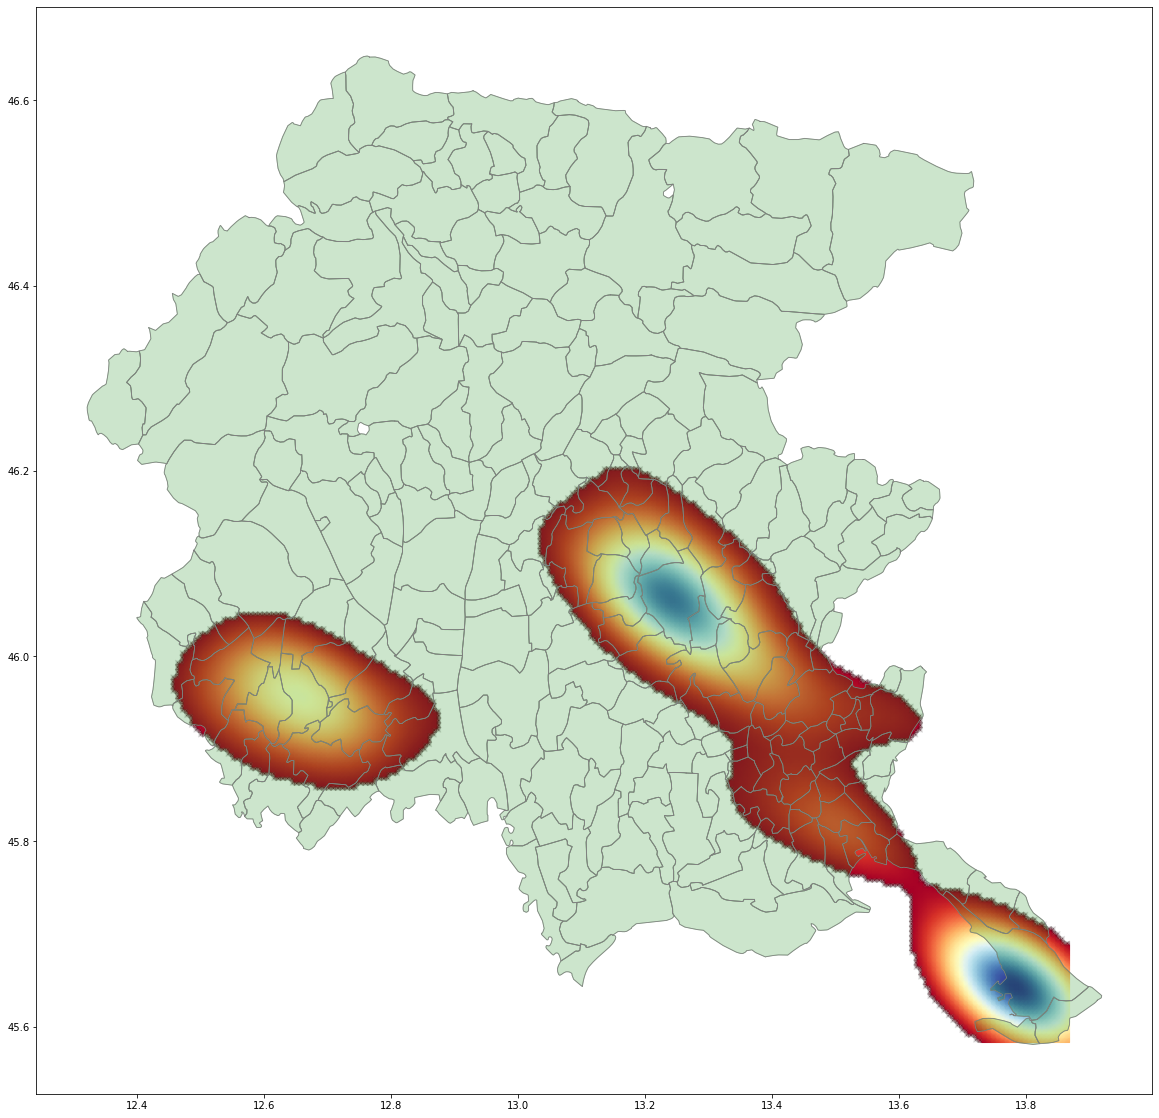

In [210]:
#load data from file
df = pd.read_json(r'./maps/FVG/FVG_mappa.json', orient='records')
# filter a single region
df=df[ df.istat_r==6]
# plot the map
fig, ax = plt.subplots(figsize=(20,20))
ax.pcolormesh(xi, yi, z_mask, shading='gouraud', cmap=cmap, alpha = 1)
plot_map(df)
plt.show()

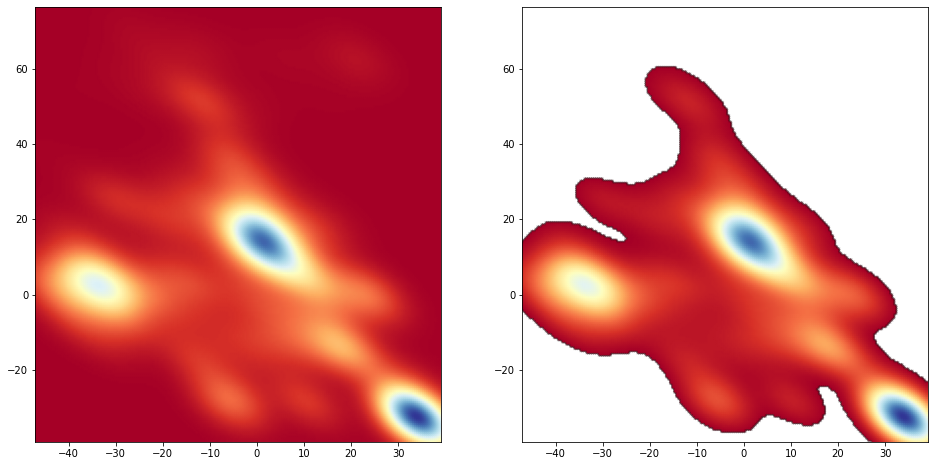

In [ ]:
epsilon = 1
minPoints = 10
dm = distance_matrix(X,X)
is_core = np.zeros(n).astype(int)
for j in range(n):
    n_neibs = np.unique(np.where( dm[j] < epsilon )).flatten()
    if len(n_neibs) >= minPoints: is_core[j] = 1


In [114]:
is_core

array([0, 1, 0, ..., 0, 1, 1])

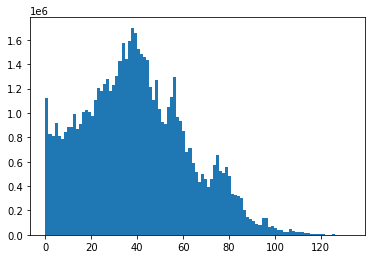

In [97]:
#compute the minimum distances of the k-th nearest neighbour
from scipy.spatial import distance_matrix
dm = distance_matrix(X,X)
values = np.reshape(dm,-1)
plt.hist(values, bins = 100)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

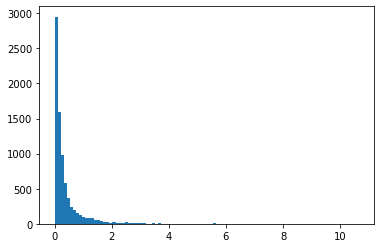

In [98]:
knn = 5
min_distances= np.partition(dm, knn, axis=0)[knn] 
plt.hist(min_distances, bins = 100)
plt.show

In [99]:
for p in range(10,100,10):
    print(f"il {p}° percentile ==> distanza {np.percentile(min_distances, p)}")

il 10° percentile ==> distanza 0.0
il 20° percentile ==> distanza 0.05137478077814284
il 30° percentile ==> distanza 0.08077579846892659
il 40° percentile ==> distanza 0.11883305615872354
il 50° percentile ==> distanza 0.1713016556399173
il 60° percentile ==> distanza 0.23214323429096237
il 70° percentile ==> distanza 0.32700004543727423
il 80° percentile ==> distanza 0.4996412202701482
il 90° percentile ==> distanza 0.9358909571371151


In [100]:
# dm = distance_matrix(X,X)
# index = 2
# distances = dm[index]

# epsilon = .02

# distances_epsilon = distances[ distances <= epsilon]



In [101]:
# def epsilon_neighborhood( index, epsilon):
#     distances = dm[index]
#     neighbours_indices = np.where( distances <= epsilon )
#     return np.array(neighbours_indices)[0]

# def is_core(p, epsilon, minPoints):
#     nbhood =  epsilon_neighborhood(p, epsilon)
#     return (len(nbhood) >= minPoints)

# def is_directly_density_reachable(p,q, epsilon, minPoints):
#     '''An object q is directly density-reachable from object p 
#     if q is within the ε-Neighborhood of p 
#     and p is a core object'''
#     is_ddr = False
#     neib=np.array([])
#     if is_core(p, epsilon, minPoints):
#         neib = epsilon_neighborhood(p, epsilon)
#         if (q in neib):
#             is_ddr = True
#     return is_ddr, neib




In [102]:
# for eps in [.11, .002]:
#     nbindexes = epsilon_neighborhood(12, eps)
#     print(nbindexes)
    

In [103]:
# for i in range(70):
#     nbindexes =  epsilon_neighborhood(i, epsilon=.0011)
#     print( len(nbindexes))
    

In [104]:
# epsilon = .0011
# minPoints = 26
# t,f= 0,0
# for p in range(100):
#     for q in range(100):
#         is_ddr, neib = is_directly_density_reachable(p,q, epsilon, minPoints)
#         if is_ddr: 
#             t+=1 
#         else: 
#             f+=1

# print(t,f)

In [105]:
#retrieva all points density reachable from P

# def density_reachable( p, epsilon, minPoints):
#     density_reachable = []
#     for q in list(points):
#         is_ddr, neib = is_directly_density_reachable(p,q, epsilon, minPoints)
#         if is_ddr: 
#             density_reachable.append(neib)
#     return density_reachable



In [106]:

def clustering_DBSCAN_noise(X, epsilon, minPoints):
    n_points = len(X)
    dm = distance_matrix(X,X)
    # identify core points 
    is_core = np.zeros(n_points).astype(int)
    for j in range(n_points):
        n_neibs = np.unique(np.where( dm[j] < epsilon )).flatten()
        if len(n_neibs) >= minPoints: is_core[j] = 1
 
    
    points = np.arange(n_points)
    clusters = np.zeros(n_points)

    cluster_id = 0
    tovisit = np.sum(clusters == 0)
    while(tovisit > 0):
        is_core_unvisited = ((clusters == 0) & (is_core == 1))
        p = np.random.choice(points[ is_core_unvisited ])
        # directly density reachable!
        nbhood = np.unique(np.where( dm[p] <= epsilon )).flatten()
        #check indirect reachability  
        
        old_nb_len = 0
        nb_len = len(nbhood)
        while (nb_len>old_nb_len): 
            for q in nbhood: 

                indirect = np.unique(np.where( dm[q] <= epsilon )).flatten()
                nbhood = np.unique(np.append(nbhood, indirect).flatten())
            # add here a condition to keep searching further levels  
            old_nb_len = nb_len
            nb_len = len(nbhood)
  
             
                
        if (len(nbhood) >= minPoints):# is_core:
            cluster_id += 1
            clusters[p] = int(cluster_id)
            for q in nbhood:
                    clusters[q] = int(cluster_id)
        else: #is halo
            clusters[p] = int(-1)

        is_core_unvisited = ((clusters == 0) & (is_core == 1))
        tovisit = len(points[is_core_unvisited])
    
    #encode "halo" as 0    
    clusters[ clusters == -1] = 0
    return clusters
    

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0}


Text(0, 0.5, 'Y')

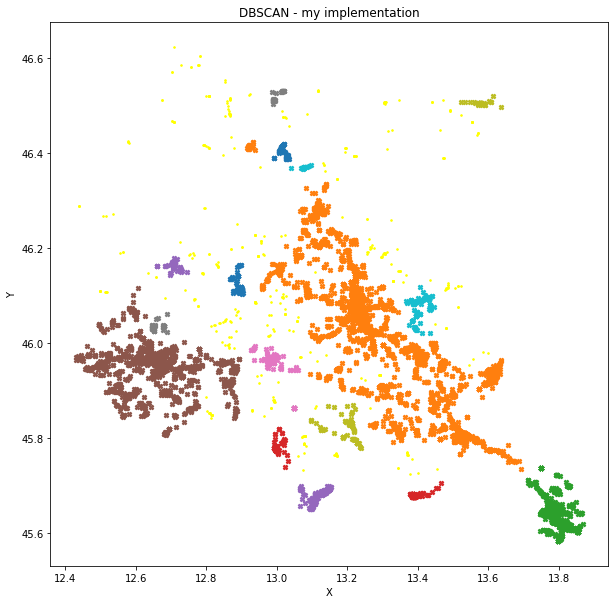

In [117]:
epsilon = 2
minPoints= 20
np.random.seed(123)
clusters = clustering_DBSCAN_noise(X, epsilon=epsilon, minPoints=minPoints)
print((set(clusters)))

data['cluster']=clusters.astype(int)
data = data[ [ 'cf', 'company', 'lat', 'lon', 'cluster'] ]
data.to_csv('./data/FVG_comp_clusters.csv', index=False)

plt.figure(figsize=(10,10))

for clust in list(set(data.cluster)):
    x = np.array(data.lon[ data.cluster == clust ])
    y = np.array(data.lat[ data.cluster == clust ])
    if clust == 0: 
        plt.scatter(x, y, s=10, marker = ".", color = "yellow", label="halo")
    else:
        plt.scatter(x, y, s=20, marker = "X", label=f"Cluster{clust}")


#plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
#plt.legend()
plt.title('DBSCAN - my implementation')
plt.xlabel('X')
plt.ylabel('Y')

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0}


Text(0, 0.5, 'Y')

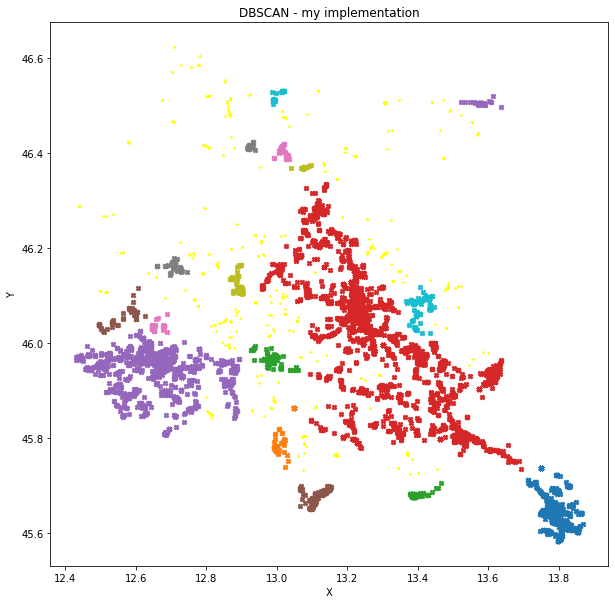

In [118]:

np.random.seed(999)
clusters = clustering_DBSCAN_noise(X, epsilon=epsilon, minPoints=minPoints)
print((set(clusters)))

data['cluster']=clusters.astype(int)
data = data[ [ 'cf', 'company', 'lat', 'lon', 'cluster'] ]
data.to_csv('./data/FVG_comp_clusters.csv', index=False)

plt.figure(figsize=(10,10))

for clust in list(set(data.cluster)):
    x = np.array(data.lon[ data.cluster == clust ])
    y = np.array(data.lat[ data.cluster == clust ])
    if clust == 0: 
        plt.scatter(x, y, s=10, marker = ".", color = "yellow", label="halo")
    else:
        plt.scatter(x, y, s=20, marker = "X", label=f"Cluster{clust}")


#plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
#plt.legend()
plt.title('DBSCAN - my implementation')
plt.xlabel('X')
plt.ylabel('Y')

29


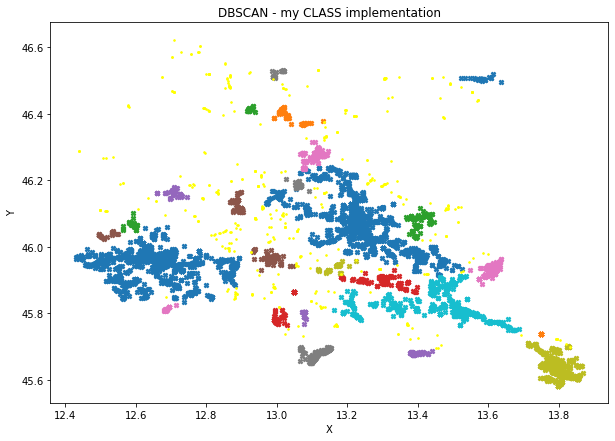

In [123]:
from sklearn.cluster import DBSCAN
epsilon = 2.2
minPoints= 20

clustering = DBSCAN(eps=epsilon, min_samples=minPoints).fit(X)
cc = clustering.labels_
plt.figure(figsize=(10,7))
for clust in list(set(cc)):
    x = np.array(data.lon[ clust == cc ])
    y = np.array(data.lat[ clust == cc ])
    if clust == -1: 
        plt.scatter(x, y, s=10, marker = ".", color = "yellow", label="halo")
    else:
        plt.scatter(x, y, s=20, marker = "X", label=f"Cluster{clust}")


#plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
#plt.legend()
plt.title('DBSCAN - my CLASS implementation')
plt.xlabel('X')
plt.ylabel('Y')

print(len(set(cc)))

In [110]:
print(":-D")

:-D


Silhouette score
eg from here
https://gist.github.com/AlexandreAbraham/5544803?msclkid=57d3c2cfb28b11ec853386a9714df71b


calculate comparison (precision, recall) as in this
https://towardsdatascience.com/evaluating-clustering-results-f13552ee7603


In [111]:
from sklearn.metrics.cluster import fowlkes_mallows_score

np.random.seed(999)
clusters1 = clustering_DBSCAN_noise(X, epsilon=.0015, minPoints=20)
plot_clusters(X, clusters1)

clusters2 = clustering_DBSCAN_noise(X, epsilon=.0010, minPoints=20)
plot_clusters(X, clusters2)

clusters3 = clustering_DBSCAN_noise(X, epsilon=.0005, minPoints=20)
plot_clusters(X, clusters3)

plt.show()
fowlkes_mallows_score(clusters2, clusters1)

1.0

https://geodacenter.github.io/workbook/99_density/lab9b.html?msclkid=d7e2bc81b28d11ec92fcd58b49d1b2ba

Laio / Peak Halo
https://people.sissa.it/~laio/Research/Res_clustering.php
file:///C:/Users/morea/Downloads/Clustering_by_fast_search_and_find_of_density_peaks.pdf


https://github.com/markovmodel/PyEMMA/issues/998?msclkid=96f31b4db28d11ec985ce9b15c28caff

Rodriguez, A., & Laio, A. (2014). Clustering by fast search and find of density peaks. Science, 344(6191), 1492-1496. doi:10.1126/science.1242072


https://github.com/thomasp85/densityClust



Density Peaks 

https://github.com/lanbing510/DensityPeakCluster?msclkid=1fd85fbab28f11ec870cbd2dc3baebd7
